In [1]:
import networkx as nx

<h4> An example directed graph

In [2]:
G1 = nx.DiGraph() 

In [3]:
G1.add_nodes_from([0, 1, 2])
G1.add_edges_from([(0,1),(1,0),(0,2),(2,1)])

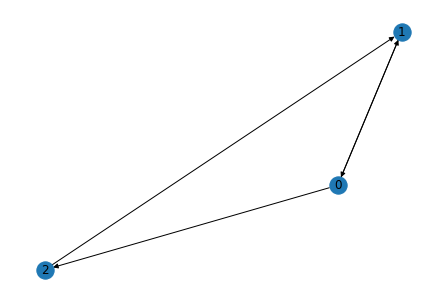

In [4]:
nx.draw(G1, with_labels=True)

In [5]:
G1.nodes

NodeView((0, 1, 2))

In [6]:
G1.edges

OutEdgeView([(0, 1), (0, 2), (1, 0), (2, 1)])

In [7]:
G1.degree

DiDegreeView({0: 3, 1: 3, 2: 2})

<h4> An example undirected graph

In [8]:
G2 = nx.Graph() 

In [9]:
G2.add_nodes_from([0, 1, 2])
G2.add_edges_from([(0,1),(0,2)])

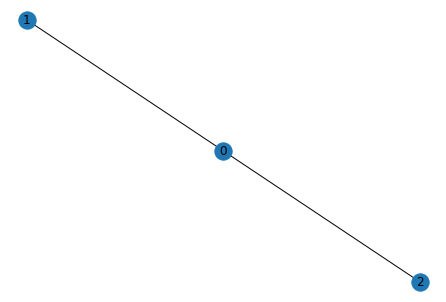

In [10]:
nx.draw(G2, with_labels=True)

In [11]:
G2.degree

DegreeView({0: 2, 1: 1, 2: 1})

<h4> Modularity

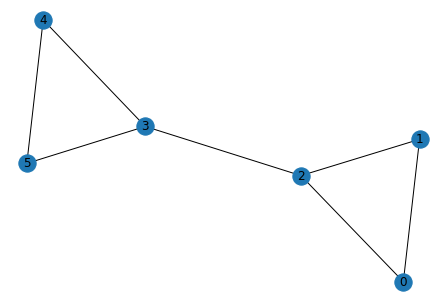

In [12]:
G = nx.barbell_graph(3, 0)
nx.draw(G, with_labels=True)

In [13]:
nx.community.modularity(G, [{0, 1, 2,3, 4, 5}]) #one community; modularity = 0

1.1102230246251565e-16

In [17]:
nx.community.modularity(G, [{0, 1, 2}, {3, 4, 5}]) #two communities: modularity = 0.357

0.35714285714285715

<h4> Exercise: Recalculate these value using the expression for $Q$.

In [20]:
m = 7
Q = 0
for i in range(6):
    for j in range(6):
        if (i,j) in G.edges:
            Q += (1-G.degree[i]*G.degree[j]/(2*m))
        else:
            Q += (0-G.degree[i]*G.degree[j]/(2*m))
            
Q = (1/(2*m))*Q
print(Q)

-1.586032892321652e-17


In [21]:
m = 7
Q = 0
for i in range(3):
    for j in range(3):
        if (i,j) in G.edges:
            Q += (1-G.degree[i]*G.degree[j]/(2*m))
        else:
            Q += (0-G.degree[i]*G.degree[j]/(2*m))

for i in range(3,6):
    for j in range(3,6):
        if (i,j) in G.edges:
            Q += (1-G.degree[i]*G.degree[j]/(2*m))
        else:
            Q += (0-G.degree[i]*G.degree[j]/(2*m))
            
            
Q = (1/(2*m))*Q
print(Q)

0.35714285714285704


<h4> Graphs with weighted edges

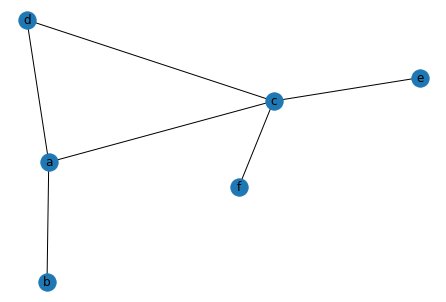

In [15]:
G = nx.Graph()

G.add_edge("a", "b", weight=0.6)
G.add_edge("a", "c", weight=0.2)
G.add_edge("c", "d", weight=0.1)
G.add_edge("c", "e", weight=0.7)
G.add_edge("c", "f", weight=0.9)
G.add_edge("a", "d", weight=0.3)

nx.draw(G, with_labels=True)

<h4> Louvain communities

{0: 1, 1: 1, 2: 1, 3: 0, 4: 0, 5: 0}


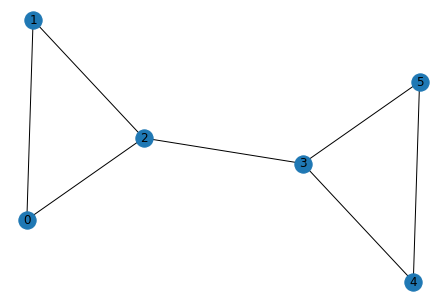

In [16]:
import community.community_louvain as cl
import networkx as nx

G = nx.barbell_graph(3, 0)
nx.draw(G, with_labels=True)
partition = cl.best_partition(G)
print(partition)

<h4> Exercise: Open $scRNAdata.csv$ file. Rows are genes, columns are cells.

    
- How many cells and genes are considered?
- Standarize the data and apply PCA with $k=2$.
- Plot the PCA1 vs PCA2 components. Do you notice some groups?
- Build a graph on cells, where the edge weight is defined as $\frac{1}{||c_i-c_j||}$.
- Find the best partition of the graph.
- Plot the PCA1 vs PCA2 components once again. Colour the data points according to partition. 

In [22]:
import pandas as pd

d = pd.read_csv('scRNAdata.csv', sep=',', index_col=0)
d.head()

,cell0,cell1,cell2,cell3,cell4,cell5,cell6,cell7,cell8,cell9,...,cell360,cell361,cell362,cell363,cell364,cell365,cell366,cell367,cell368,cell369
0,1404.0,1382.0,10845.0,414.0,3698.0,1846.0,2452.0,1128.0,7309.0,2544.0,...,9415.0,181.0,1167.0,502.0,4704.0,10165.0,6416.0,4530.0,470.0,556.0
1,10445.0,739.0,3675.0,209.0,3212.0,7308.0,859.0,7577.0,2475.0,1178.0,...,6108.0,4.0,2742.0,6336.0,651.0,876.0,2357.0,2975.0,197.0,3690.0
2,7137.0,959.0,260.0,6356.0,6157.0,6698.0,732.0,58.0,4493.0,6539.0,...,7151.0,2700.0,4111.0,6996.0,3825.0,443.0,1628.0,2004.0,1150.0,7836.0
3,190.0,1264.0,8449.0,3548.0,4312.0,3637.0,3513.0,1649.0,1838.0,1792.0,...,4036.0,6749.0,2175.0,1701.0,87.0,4381.0,1326.0,3197.0,3426.0,378.0
4,1432.0,1439.0,534.0,1314.0,6166.0,5702.0,5279.0,1291.0,3491.0,2176.0,...,4022.0,7837.0,328.0,2230.0,2295.0,1679.0,1066.0,6951.0,3684.0,4929.0


In [23]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles

In [24]:
#Standarization
stdsc = StandardScaler()
X = stdsc.fit_transform(d)

#PCA
pca = PCA(2)
X2 = pca.fit_transform(X.T) 
print(X2.shape)

(370, 2)


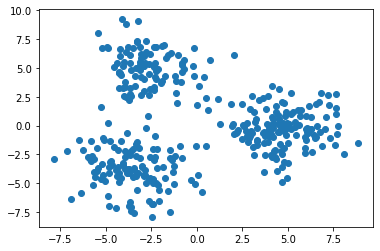

In [25]:
plt.scatter(X2[:,0], X2[:,1]) #plot PC1/PC2
plt.show()

In [26]:
#build a graph
G = nx.Graph()
for i in range(370):
    for j in range(370):
        if i != j:
            G.add_edge(i, j, weight=1/np.linalg.norm(X2[i]-X2[j]))

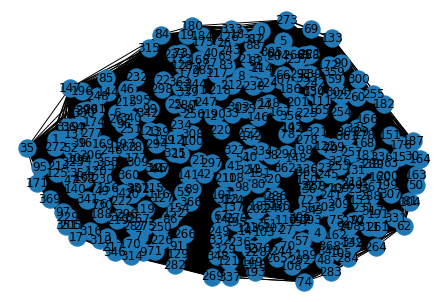

In [27]:
nx.draw(G, with_labels=True)

In [28]:
#best partition according to modularity

partition = cl.best_partition(G)
print(partition)

{0: 0, 1: 1, 2: 0, 3: 1, 4: 2, 5: 0, 6: 1, 7: 1, 8: 0, 9: 1, 10: 2, 11: 1, 12: 2, 13: 1, 14: 2, 15: 2, 16: 1, 17: 1, 18: 0, 19: 0, 20: 1, 21: 1, 22: 0, 23: 2, 24: 0, 25: 0, 26: 0, 27: 2, 28: 1, 29: 2, 30: 2, 31: 2, 32: 2, 33: 0, 34: 0, 35: 1, 36: 2, 37: 1, 38: 2, 39: 1, 40: 0, 41: 2, 42: 1, 43: 2, 44: 1, 45: 2, 46: 1, 47: 1, 48: 2, 49: 1, 50: 2, 51: 2, 52: 1, 53: 0, 54: 2, 55: 1, 56: 2, 57: 2, 58: 0, 59: 0, 60: 0, 61: 0, 62: 2, 63: 2, 64: 0, 65: 0, 66: 0, 67: 2, 68: 2, 69: 0, 70: 2, 71: 1, 72: 2, 73: 0, 74: 2, 75: 2, 76: 1, 77: 0, 78: 2, 79: 2, 80: 2, 81: 2, 82: 0, 83: 0, 84: 0, 85: 1, 86: 1, 87: 0, 88: 0, 89: 1, 90: 0, 91: 1, 92: 2, 93: 2, 94: 2, 95: 1, 96: 1, 97: 1, 98: 2, 99: 1, 100: 1, 101: 2, 102: 2, 103: 2, 104: 2, 105: 2, 106: 1, 107: 1, 108: 2, 109: 2, 110: 2, 111: 0, 112: 1, 113: 2, 114: 0, 115: 1, 116: 1, 117: 0, 118: 2, 119: 1, 120: 1, 121: 2, 122: 2, 123: 1, 124: 2, 125: 1, 126: 0, 127: 1, 128: 0, 129: 1, 130: 1, 131: 2, 132: 2, 133: 0, 134: 0, 135: 0, 136: 2, 137: 2, 138: 

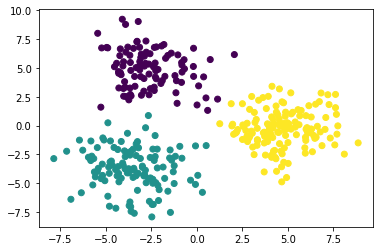

In [30]:
plt.scatter(X2[:,0], X2[:,1], c = list(partition.values())) #plot PC1/PC2 with clusters
plt.show()